#POSTTEST5

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

df = pd.read_csv('student.csv')

## Preprocessing
# Convert categorical data to numeric

In [80]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

## Split data into features and target

In [81]:
X = df.drop('High_School_Type', axis=1)
y = df['High_School_Type']

## Convert target to one-hot encoding

In [82]:
y = to_categorical(y)

## Split data into training and validation set

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalization

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Create a sequential model with more neurons and layers

In [69]:
# Create a sequential model with more neurons and layers
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

## Compile the model

In [70]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Define EarlyStopping

In [71]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

## Train the model with EarlyStopping

In [72]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32, callbacks=[early_stopping])

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.2987 - loss: 1.2426 - val_accuracy: 0.4483 - val_loss: 1.0604
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5568 - loss: 0.9961 - val_accuracy: 0.5172 - val_loss: 1.0109
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6838 - loss: 0.9278 - val_accuracy: 0.5517 - val_loss: 1.0155
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7292 - loss: 0.7716 - val_accuracy: 0.5517 - val_loss: 1.0560
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7188 - loss: 0.7945 - val_accuracy: 0.5517 - val_loss: 1.0976
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7510 - loss: 0.7342 - val_accuracy: 0.5517 - val_loss: 1.1373
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7865 - loss: 0.6577 - val_accuracy: 0.5517 - val_loss: 1.1696
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7625 - loss: 0.7433 - val_accuracy: 0.5517 - val_loss: 1.1711

## Evaluate the model

In [73]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)

In [74]:
print('Train Accuracy: %.3f, Validation Accuracy: %.3f' % (train_acc, val_acc))

Train Accuracy: 0.750, Validation Accuracy: 0.552


## Visualize training history
# Plot akurasi training dan validation

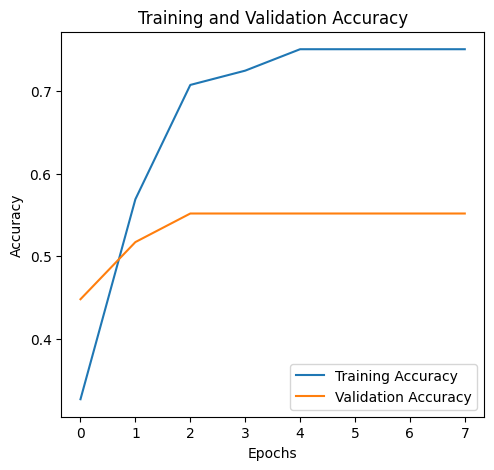

In [75]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Plot loss training dan validation

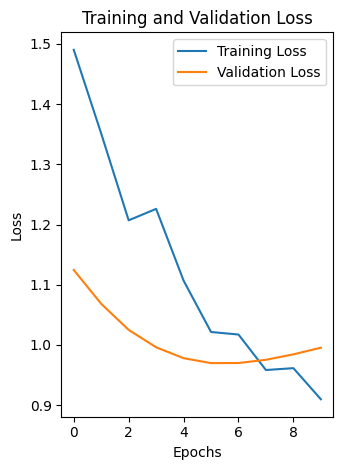

In [68]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()